In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn factor_analyzer

     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.8 kB 129.6 kB/s eta 0:00:01
     --------------------------- ---------- 30.7/42.8 kB 163.8 kB/s eta 0:00:01
     -------------------------------------- 42.8/42.8 kB 189.4 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42623 sha256=66ddfdcb2cbb3735f78cd45613870717f65a73af11ea916ded833a10f0008a1f
  Stored in directory: c:\users\a\appdata\local\pip\cache\wheels\fa\f7\53\a55a8a56668a6fe0199e0e02b6e0ae3007ec35c

In [2]:
# Import necessary libraries
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from factor_analyzer import FactorAnalyzer

In [3]:
# Set the environment variable to avoid memory leak issue on Windows
os.environ["OMP_NUM_THREADS"] = "1"
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")
# Set the file path and read the data
file_path = "D:/SCMA632__FIRE632/Stats/Assignment/A4/Survey.csv"  # Adjust the path if necessary
data = pd.read_csv(file_path)
# View the structure of the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   City                                       70 non-null     object 
 1   Sex                                        70 non-null     object 
 2   Age                                        70 non-null     object 
 3   Occupation                                 70 non-null     object 
 4   Monthly Household Income                   70 non-null     object 
 5   Income                                     70 non-null     int64  
 6   Planning to Buy a new house                70 non-null     object 
 7   Time Frame                                 70 non-null     object 
 8   Reasons for buying a house                 70 non-null     object 
 9   what type of House                         70 non-null     object 
 10  Number of rooms             

In [4]:
# Extract only the numeric columns
numeric_data = data.select_dtypes(include=[np.number])
# Handle missing values if any (e.g., by removing rows with NA values or imputing them)
numeric_data = numeric_data.dropna()
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)
# Perform Principal Component Analysis (PCA)
pca = PCA()
pca_result = pca.fit_transform(data_scaled)
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by component: {explained_variance}")

Explained variance by component: [0.32332366 0.08683237 0.07160269 0.06073222 0.05629444 0.04609823
 0.0437729  0.0396524  0.03529825 0.02731472 0.02451182 0.02392867
 0.01975551 0.01917115 0.01748088 0.01597239 0.01474926 0.01261225
 0.00966406 0.00947208 0.00718757 0.00666932 0.00626669 0.00620703
 0.00443108 0.0030697  0.00223431 0.00186911 0.00164179 0.00139072
 0.00079276]


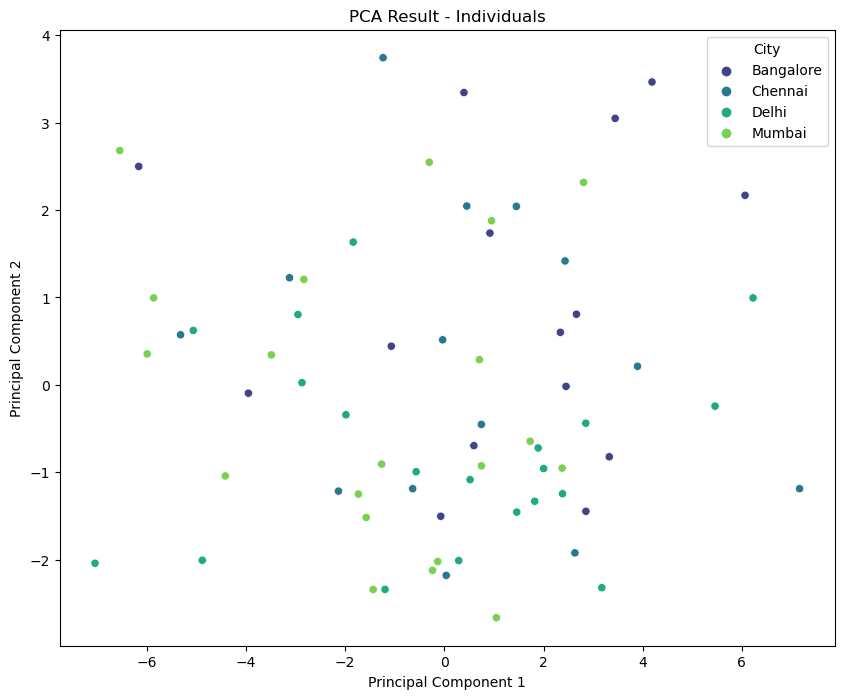

In [5]:
# Plot PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=data['City'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result - Individuals')
plt.show()

In [6]:
# Perform Factor Analysis
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(data_scaled)
loadings = fa.loadings_
print(f"Factor loadings:\n{loadings}")

Factor loadings:
[[ 0.87898158 -0.11216452]
 [ 0.49398599  0.22116766]
 [ 0.40063564 -0.22171645]
 [-0.06162397 -0.20666122]
 [ 0.15126259 -0.01511607]
 [ 0.6014778   0.35797903]
 [ 0.50158664 -0.1569967 ]
 [ 0.55160093 -0.0612569 ]
 [ 0.41109768  0.11123096]
 [ 0.55174881 -0.32082335]
 [ 0.52124337 -0.1069959 ]
 [ 0.65780858  0.50181343]
 [ 0.16042628 -0.1463562 ]
 [ 0.73761552  0.02671801]
 [ 0.6335144  -0.00320895]
 [ 0.75392972  0.0922536 ]
 [ 0.34338592 -0.29463039]
 [ 0.03468597  0.52665391]
 [-0.07218287  0.27868452]
 [-0.15275097  0.3216963 ]
 [-0.11066812  0.67566411]
 [ 0.55473809 -0.29168886]
 [ 0.3332898   0.20918001]
 [ 0.70091156 -0.26697684]
 [ 0.60423683  0.14553236]
 [ 0.0801607   0.31097159]
 [ 0.85697758  0.00303065]
 [ 0.87583421 -0.04850017]
 [ 0.87269805 -0.0390809 ]
 [ 0.87708708 -0.07190631]
 [ 0.49499849 -0.13731467]]


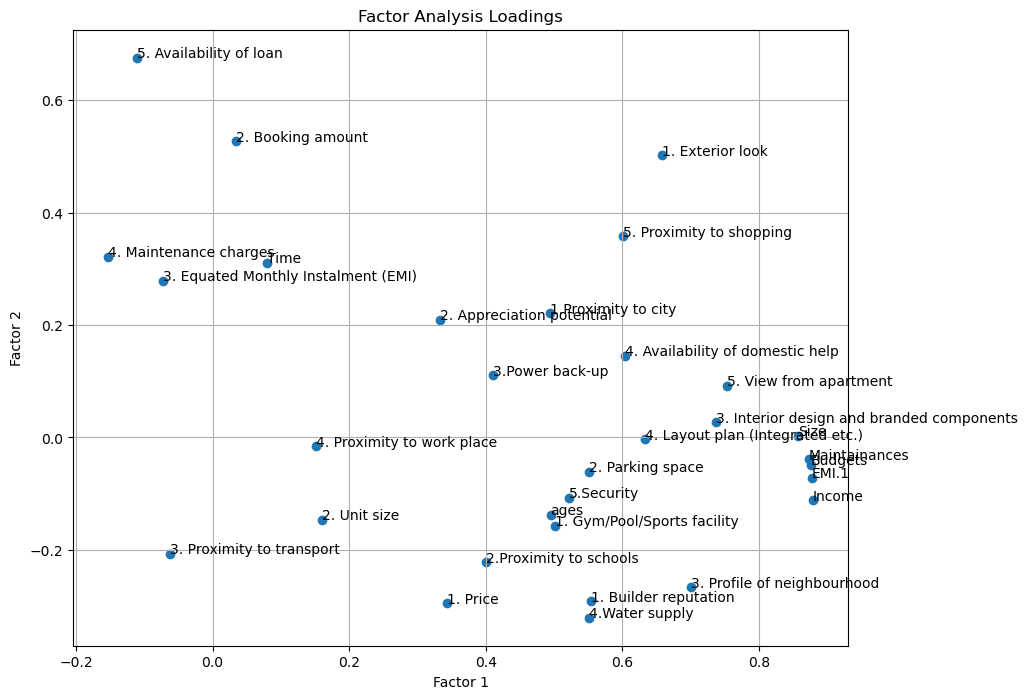

In [7]:
# Plot Factor Analysis results
plt.figure(figsize=(10, 8))
plt.scatter(loadings[:, 0], loadings[:, 1])
for i, var in enumerate(numeric_data.columns):
    plt.annotate(var, (loadings[i, 0], loadings[i, 1]))
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor Analysis Loadings')
plt.grid()
plt.show()

In [8]:
# Determine the optimal number of clusters using the Elbow Method and Silhouette Method
wss = []
silhouette_scores = []
range_n_clusters = list(range(2, 11))

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=123, n_init=10)
    kmeans.fit(data_scaled)
    wss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

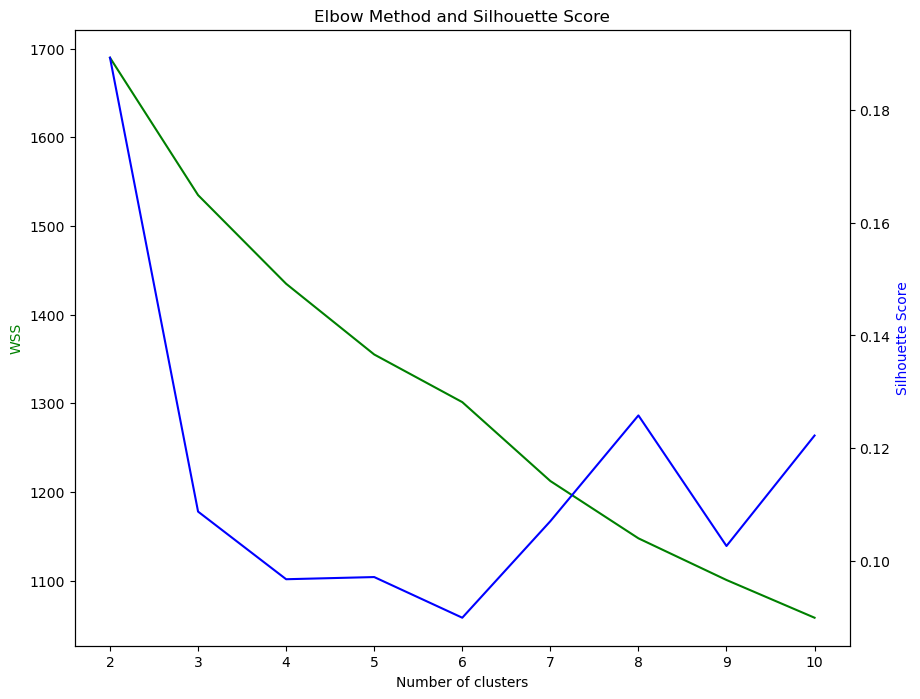

In [9]:
# Plot the WSS and Silhouette scores
fig, ax1 = plt.subplots(figsize=(10, 8))

ax2 = ax1.twinx()
ax1.plot(range_n_clusters, wss, 'g-')
ax2.plot(range_n_clusters, silhouette_scores, 'b-')

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WSS', color='g')
ax2.set_ylabel('Silhouette Score', color='b')

plt.title('Elbow Method and Silhouette Score')
plt.show()

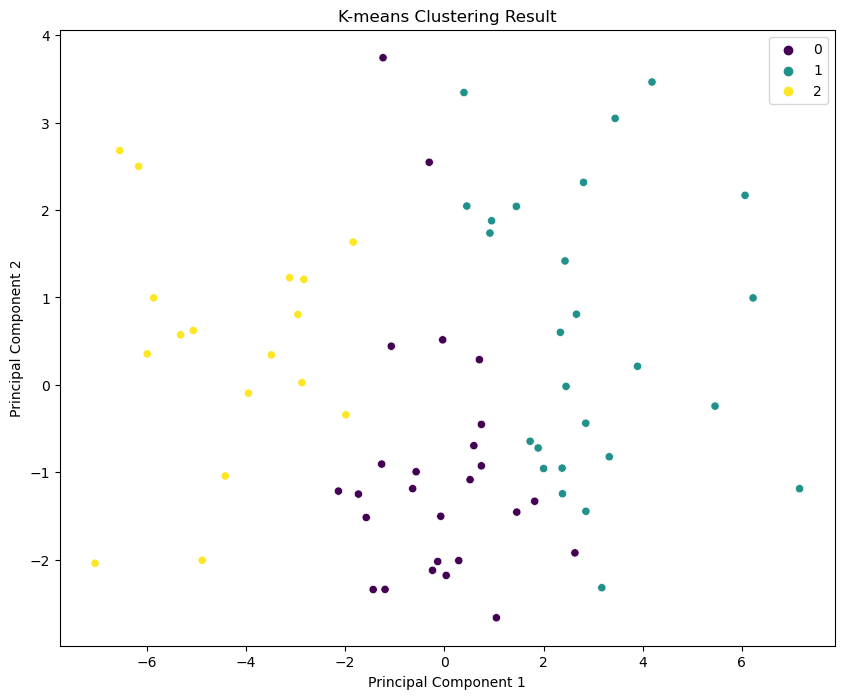

In [10]:
# Perform K-means clustering
optimal_clusters = 3  # Based on the Elbow Method and Silhouette Score
kmeans = KMeans(n_clusters=optimal_clusters, random_state=123, n_init=10)
kmeans_labels = kmeans.fit_predict(data_scaled)
# Visualize the clustering result
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_labels, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Result')
plt.show()

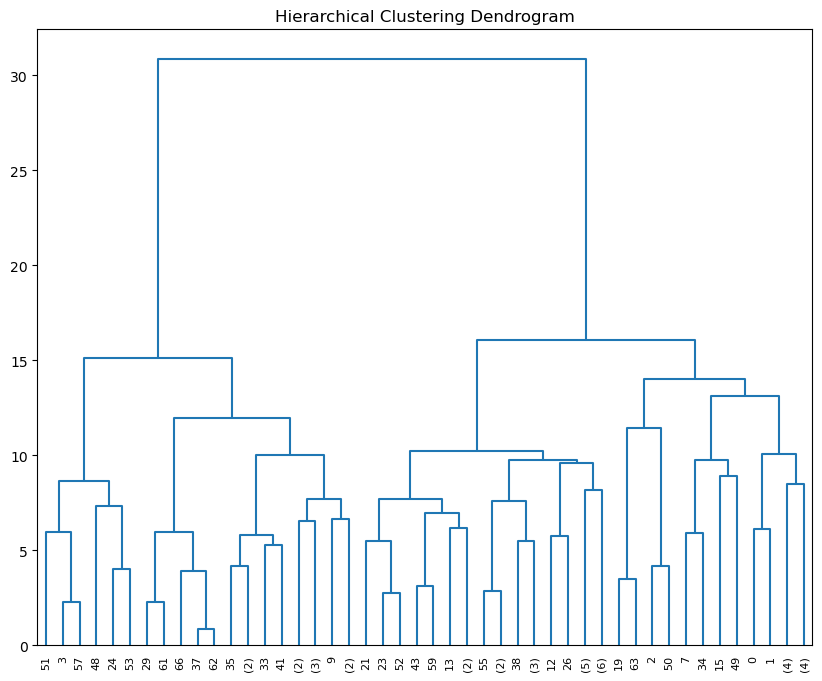

In [11]:
# Additional Cluster Analysis - Hierarchical Clustering
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 8))
dendrogram(linked, truncate_mode='level', p=5, color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

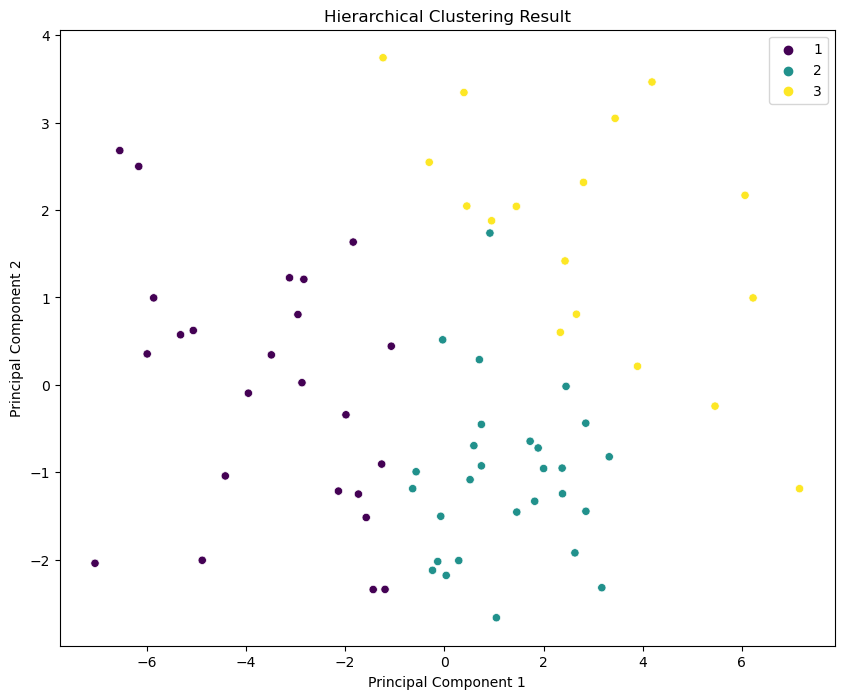

In [12]:
# Assign clusters from hierarchical clustering
hierarchical_clusters = fcluster(linked, t=optimal_clusters, criterion='maxclust')
# Visualize the hierarchical clustering result
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=hierarchical_clusters, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering Result')
plt.show()